In [1]:
import numpy as np
from src.config.paths import DATA_DIR

input_data, input_label = np.load(DATA_DIR / "Pre_Training_Data" / "arr_data.npy"), np.load(
    DATA_DIR / "Pre_Training_Data" / "arr_label.npy")

In [2]:
from src.data_prerequisite.Prerequisite_Function import CWT_Scalogram_2D

sample = input_data[0:100, :, :]
sample_CWT = CWT_Scalogram_2D(sample)

CWT 处理进度：0/100
CWT 处理进度：10/100
CWT 处理进度：20/100
CWT 处理进度：30/100
CWT 处理进度：40/100
CWT 处理进度：50/100
CWT 处理进度：60/100
CWT 处理进度：70/100
CWT 处理进度：80/100
CWT 处理进度：90/100
(100, 2400, 1) (100, 32, 2400, 1)


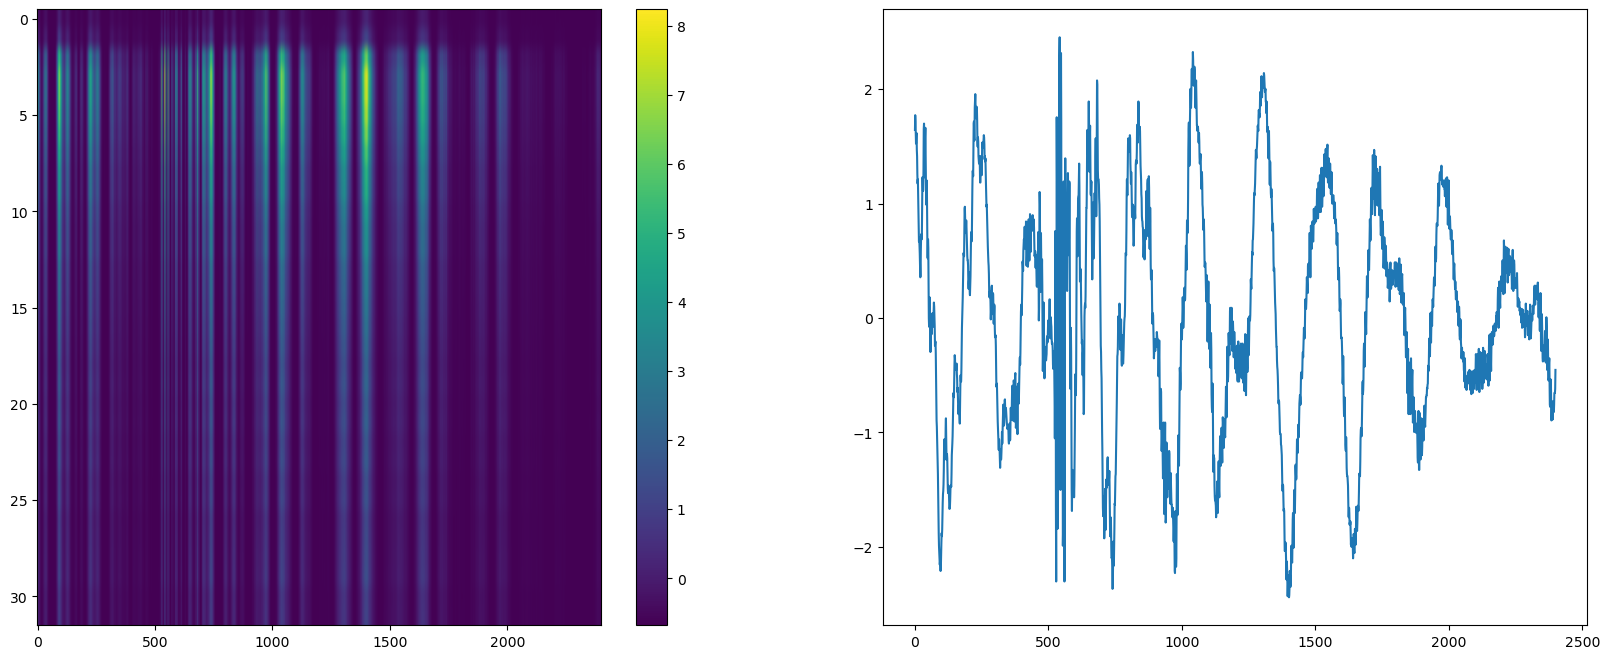

In [3]:
import matplotlib.pyplot as plt


def show_image(batch):

    fig, ax = plt.subplots(1, 2, figsize=(20, 8))

    sample_image = sample_CWT[batch, :, :, 0]
    im = ax[0].imshow(sample_image, aspect="auto")
    fig.colorbar(im, ax=ax[0])
    ax[1].plot(np.arange(0, 2400), input_data[batch, :, 0])
    plt.show()


show_image(43)

In [4]:
import numpy as np

post_process_data = np.load(DATA_DIR / "data_test.npy")
post_process_data_label = np.load(DATA_DIR / "label_test.npy")

In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
from src.enhancing_module.FusionVibDataset import FusionVibDataset
from src.config.paths import DATA_DIR

# 读取存储的学习数据
data_test_c_1D = np.load(DATA_DIR / "data_test_1D.npy")
data_train_c_1D = np.load(DATA_DIR / "data_train_1D.npy")
data_val_c_1D = np.load(DATA_DIR / "data_val_1D.npy")

data_test_c_2D = np.load(DATA_DIR / "data_test_2D.npy")
data_train_c_2D = np.load(DATA_DIR / "data_train_2D.npy")
data_val_c_2D = np.load(DATA_DIR / "data_val_2D.npy")

label_test_1D = np.load(DATA_DIR / "label_test_1D.npy")
label_train_1D = np.load(DATA_DIR / "label_train_1D.npy")
label_val_1D = np.load(DATA_DIR / "label_val_1D.npy")

label_test_2D = np.load(DATA_DIR / "label_test_2D.npy")
label_train_2D = np.load(DATA_DIR / "label_train_2D.npy")
label_val_2D = np.load(DATA_DIR / "label_val_2D.npy")

# 构建PyTorch数据加载器
# 训练数据加载
train_ds = FusionVibDataset(torch.tensor(data_train_c_1D, dtype=torch.float32),
                            torch.tensor(data_train_c_2D, dtype=torch.float32),
                            torch.tensor(label_train_2D, dtype=torch.long),
                            is_augmented=True)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)  # type: ignore
# 验证数据加载
val_ds = FusionVibDataset(torch.tensor(data_val_c_1D, dtype=torch.float32),
                          torch.tensor(data_val_c_2D, dtype=torch.float32),
                          torch.tensor(label_val_2D, dtype=torch.long),
                          is_augmented=False)
val_loader = DataLoader(val_ds, batch_size=64, shuffle=False)  # type: ignore
# 测试数据加载
test_ds = FusionVibDataset(torch.tensor(data_test_c_1D, dtype=torch.float32),
                           torch.tensor(data_test_c_2D, dtype=torch.float32),
                           torch.tensor(label_test_2D, dtype=torch.long),
                           is_augmented=False)
test_loader = DataLoader(test_ds, batch_size=64, shuffle=False)  # type: ignore


In [2]:
batch_x_1d, batch_x_2d, batch_y = next(iter(train_loader))